<a href="https://colab.research.google.com/github/jojeongin313/2025-1-myclass-BDA/blob/main/04w_A_mon_0311_easy_04_dataframe_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##04주 쉽게배우는 데이터분석 단원 04

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

ttn = sns.load_dataset('titanic')
ttn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 타이타닉 열(변수) 설명
- survived : 0 = 사망, 1 = 생존
- pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- sex : male = 남성, female = 여성
- age : 나이
- sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
- parch : 타이타닉 호에 동승한 부모 / 자식의 수
- fare : 티켓 요금
- embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
- class : First = 1등석, Second = 2등석, Third = 3등석
- who : 남/여/아이, 'man', 'woman', 'child'
- adult_male : 남자 어른, True/False
- deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
- embark_town : 탑승지
- alive : 생존, yes/no
- alone : 1인 탑승, True/False

In [4]:
%config inlineBackend.figure_format = 'retina'

<Axes: xlabel='sex', ylabel='count'>

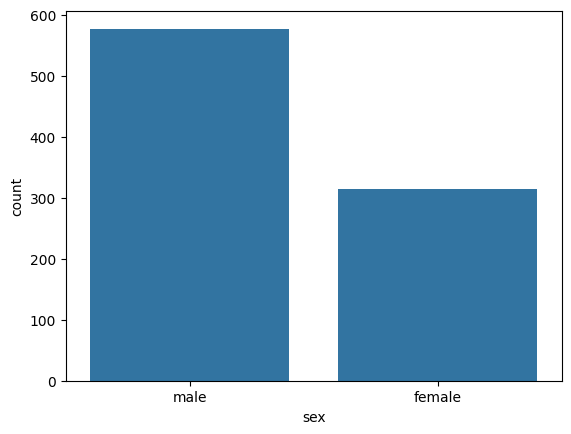

In [5]:
sns.countplot(ttn,x='sex')

<Axes: xlabel='class', ylabel='count'>

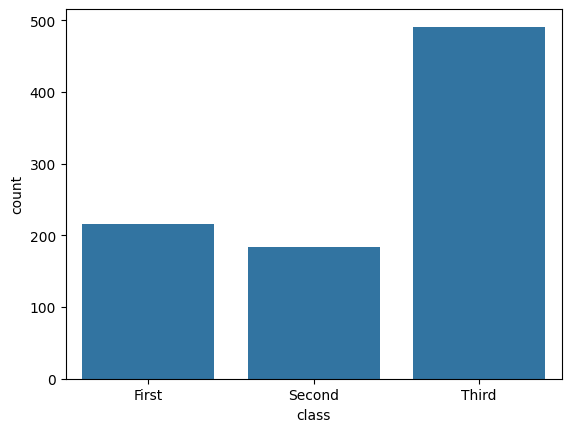

In [6]:
sns.countplot(ttn,x='class')

<Axes: xlabel='deck', ylabel='count'>

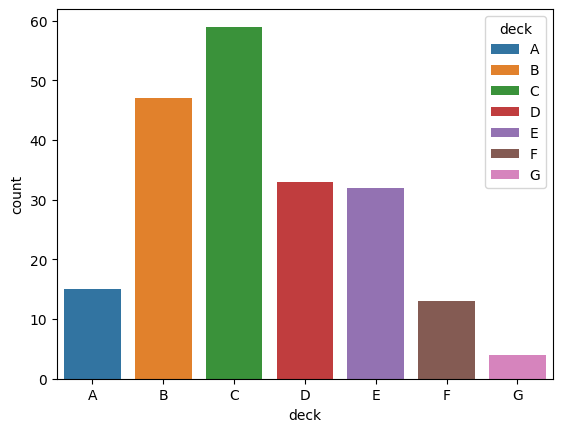

In [7]:
sns.countplot(ttn,x='deck',hue='deck')

<Axes: xlabel='class', ylabel='count'>

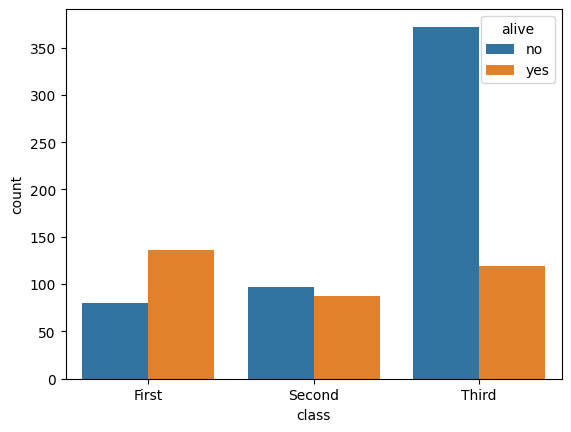

In [8]:
sns.countplot(ttn,x='class',hue='alive')

<Axes: xlabel='who', ylabel='percent'>

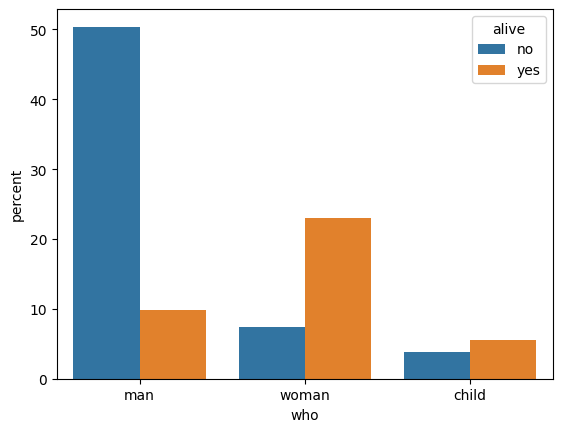

In [9]:
sns.countplot(ttn,x='who',hue='alive',stat='percent')

## 열 검사


In [10]:
ttn.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [11]:
ttn['pclass']

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [12]:
type(ttn['pclass'])

pandas.core.series.Series

In [13]:
ttn.pclass

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [14]:
ttn[['pclass','alive']]

,pclass,alive
0,3,no
1,1,yes
2,3,yes
3,1,yes
4,3,no
...,...,...
886,2,no
887,1,yes
888,3,no
889,1,yes


In [15]:
ttn.pclass.values

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3,

In [16]:
ttn.pclass.unique()

array([3, 1, 2])

In [17]:
ttn.pclass.nunique()

3

In [18]:
ttn.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
who,3


In [19]:
ttn.pclass.value_counts()

,count
pclass,
3,491
1,216
2,184


In [20]:
ttn.pclass.value_counts().sort_index()

,count
pclass,
1,216
2,184
3,491


In [21]:
ttn.pclass.value_counts().sort_values()

,count
pclass,
2,184
1,216
3,491


## 열별 그룹화

In [22]:
ttn.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [23]:
ttn.groupby('sex')

In [24]:
ttn.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [25]:
ttn.groupby('embark_town').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Cherbourg,168,168,168,130,168,168,168,168,168,168,168,69,168,168
Queenstown,77,77,77,28,77,77,77,77,77,77,77,4,77,77
Southampton,644,644,644,554,644,644,644,644,644,644,644,128,644,644


In [26]:
ttn.groupby("pclass")['fare']

In [27]:
ttn.groupby("pclass")['fare'].mean()

,fare
pclass,
1,84.154687
2,20.662183
3,13.675550


##막대그래프

<Axes: xlabel='sex', ylabel='survived'>

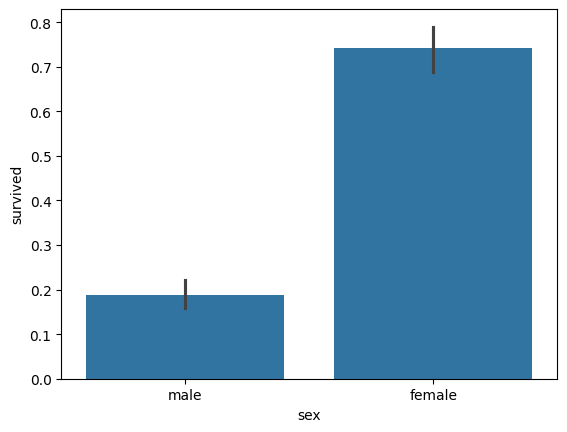

In [28]:
sns.barplot(ttn,x='sex',y='survived')

<Axes: xlabel='sex', ylabel='survived'>

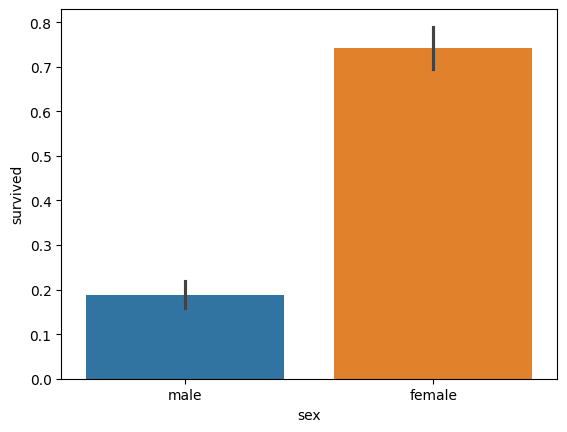

In [29]:
sns.barplot(ttn,x='sex',y='survived',hue='sex')

<Axes: xlabel='pclass', ylabel='survived'>

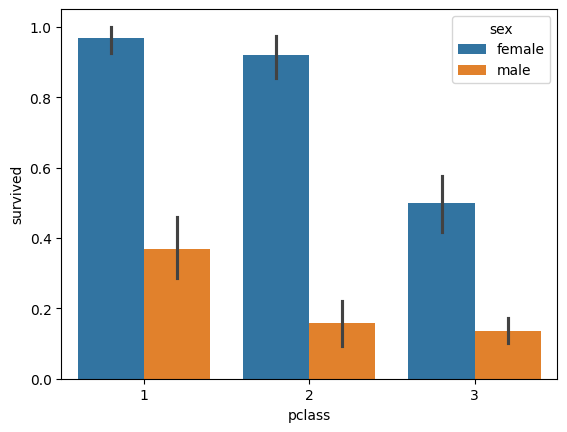

In [30]:
sns.barplot(ttn,x='pclass',y='survived',hue='sex')

<Axes: xlabel='class', ylabel='fare'>

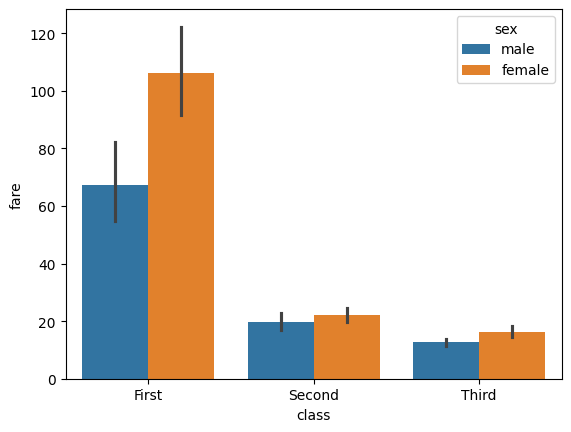

In [31]:
sns.barplot(ttn,x='class',y='fare',hue='sex')

<Axes: xlabel='deck', ylabel='fare'>

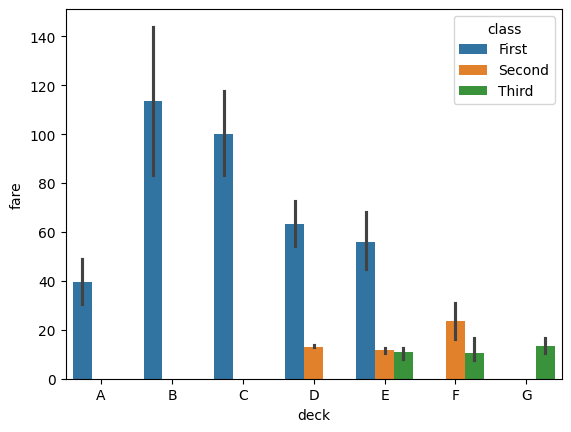

In [32]:
sns.barplot(ttn,x='deck',y='fare',hue='class')

<Axes: xlabel='deck', ylabel='survived'>

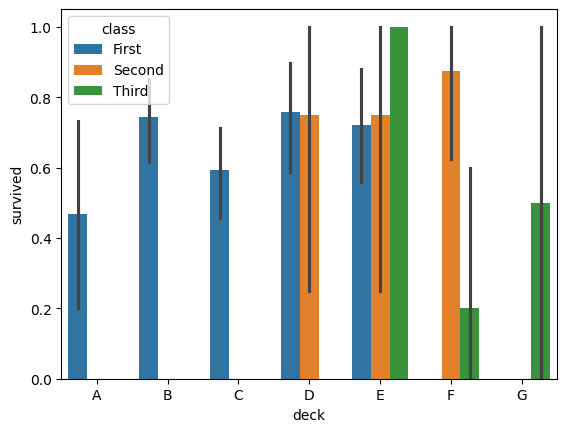

In [33]:
sns.barplot(ttn,x='deck',y='survived',hue='class')

## 단원4

In [34]:
import pandas as pd

df = pd.DataFrame({"name": ["김지훈", "이유진", "박종현", "김민지"],
                   "english": [90, 80, 60, 70],
                   "math": [50, 60, 100, 20]})
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박종현,60,100
3,김민지,70,20


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     4 non-null      object
 1   english  4 non-null      int64 
 2   math     4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [36]:
df.describe()

,english,math
count,4.000000,4.000000
mean,75.000000,57.500000
std,12.909944,33.040379
min,60.000000,20.000000
25%,67.500000,42.500000
50%,75.000000,55.000000
75%,82.500000,70.000000
max,90.000000,100.000000


In [37]:
df.describe(include="all")

,name,english,math
count,4,4.000000,4.000000
unique,4,NaN,NaN
top,김지훈,NaN,NaN
freq,1,NaN,NaN
mean,NaN,75.000000,57.500000
std,NaN,12.909944,33.040379
min,NaN,60.000000,20.000000
25%,NaN,67.500000,42.500000
50%,NaN,75.000000,55.000000
75%,NaN,82.500000,70.000000


##특정변수의 값 추출하기

In [38]:
df["math"]

,math
0,50
1,60
2,100
3,20


In [39]:
sum(df["math"])

230

In [40]:
sum(df["english"])

300

In [41]:
df["math"].sum()

np.int64(230)

In [42]:
df["english"].sum()

np.int64(300)

In [43]:
df["math"].mean()

np.float64(57.5)

In [44]:
sum(df["english"]) / len(df)

75.0

In [45]:
df["english"].mean()

np.float64(75.0)

In [46]:
df.english.mean()

np.float64(75.0)

In [47]:
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박종현,60,100
3,김민지,70,20


In [48]:
df.sum(numeric_only=True)

,0
english,300
math,230


In [49]:
df.sum()

,0
name,김지훈이유진박종현김민지
english,300
math,230


In [50]:
df.sum(axis=0)

,0
name,김지훈이유진박종현김민지
english,300
math,230


In [51]:
df.sum(axis='index')

,0
name,김지훈이유진박종현김민지
english,300
math,230


In [52]:
df.sum(axis=1,numeric_only=True)

,0
0,140
1,140
2,160
3,90


In [53]:
df.sum(axis='columns',numeric_only=True)

,0
0,140
1,140
2,160
3,90


## 외부데이터 활용

In [54]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.38 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [55]:
exam = pd.read_excel('data/excel_exam.xlsx')

exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [56]:
sum(exam['english']) / len(exam)

84.9

In [57]:
exam['english'].mean()

np.float64(84.9)

In [58]:
exam.english.mean()

np.float64(84.9)

In [59]:
exam_nover = pd.read_excel('data/excel_exam_novar.xlsx')
exam_nover

,1,1.1,50,98,50.1
0,2,1,60,97,60
1,3,2,25,80,65
2,4,2,50,89,98
3,5,3,20,98,15
4,6,3,50,98,45
5,7,4,46,98,65
6,8,4,48,87,12


In [60]:
exam_nover = pd.read_excel('data/excel_exam_novar.xlsx',header=None)
exam_nover

,0,1,2,3,4
0,1,1,50,98,50
1,2,1,60,97,60
2,3,2,25,80,65
3,4,2,50,89,98
4,5,3,20,98,15
5,6,3,50,98,45
6,7,4,46,98,65
7,8,4,48,87,12


In [62]:
exam = pd.read_excel('data/excel_exam.xlsx', sheet_name = 'Sheet2')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [63]:
exam = pd.read_excel('data/excel_exam.xlsx', sheet_name = 2)
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,99
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [64]:
exam.tail()

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,100


In [66]:
csv_exam = pd.read_csv('data/exam.csv')
csv_exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [67]:
csv_exam.to_csv("data/output_newdata.csv")

In [68]:
csv_exam.to_csv('data/output_newdata_noindex.csv', index = False)

## 혼자서 해보기

In [69]:
mydf = pd.DataFrame({'제품': ['사과', '딸기', '수박'],
                     '가격': [1800, 1500, 3000],
                     '판매량': [24, 38, 13]})
mydf

,제품,가격,판매량
0,사과,1800,24
1,딸기,1500,38
2,수박,3000,13


In [70]:
mydf.sum(axis=0,numeric_only=True)

,0
가격,6300
판매량,75


In [71]:
mydf.mean(axis=0,numeric_only=True)

,0
가격,2100.0
판매량,25.0


In [72]:
mydf.sum(axis=1,numeric_only=True)

,0
0,1824
1,1538
2,3013


In [73]:
mydf.mean(axis=1,numeric_only=True)

,0
0,912.0
1,769.0
2,1506.5


##정리하기

In [74]:
# 1. 데이터 프레임 만들기
df = pd.DataFrame({'name'    : ['김지훈', '이유진', '박동현', '김민지'],
                   'english' : [90, 80, 60, 70],
                   'math'    : [50, 60, 100, 20]})

In [76]:
# 2.외부 데이터 이용하기

# 엑셀 파일 불러오기
df_exam = pd.read_excel('data/excel_exam.xlsx')


In [77]:
# CSV 파일 불러오기
df_csv_exam = pd.read_csv('data/exam.csv')

In [78]:
# CSV 파일로 저장하기
df_midterm = pd.DataFrame({'english' : [90, 80, 60, 70],
                           'math'    : [50, 60, 100, 20],
                           'nclass'  : [1, 1, 2, 2]})
df_midterm.to_csv('output_newdata2.csv')
df_midterm.to_csv('output_newdata3.csv', index = False)